<a href="https://colab.research.google.com/github/danaadcock/707-lecture-master/blob/main/ML_Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

# Read the file with specified encoding - one-hot encoded df
ohe_x_resampled = pd.read_csv('data/ohe_x_resampled.csv', encoding='utf-8')

In [3]:
# Read the file with specified encoding
ohe_y_resampled = pd.read_csv("data/ohe_y_resampled.csv", encoding='utf-8')

In [4]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
from umap import UMAP

# Initialize dimensionality reduction techniques
umap = UMAP(n_components=2, n_neighbors = 15, min_dist = 0.1, random_state=42)

# Apply dimensionality reduction
x_umap = umap.fit_transform(ohe_x_resampled)


/anaconda/envs/jupyter_env/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [6]:
x_umap = np.array(x_umap)

In [7]:
# Convert the UMAP embeddings to a DataFrame
umap_df2 = pd.DataFrame(x_umap, columns=['UMAP1', 'UMAP2'])

# Save the DataFrame to a CSV file
umap_df2.to_csv('data/umap_embeddings2.csv', index=False)

In [ ]:
#Once umap is saved, can load in

In [8]:
from sklearn.cluster import KMeans

# Fit and predict clusters for each algorithm on UMAP-reduced data
kmeans = KMeans(n_clusters=2)  # You can adjust the number of clusters as needed
kmeans_labels_umap = kmeans.fit_predict(x_umap)

/anaconda/envs/jupyter_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
from sklearn.cluster import DBSCAN

# Apply DBScan clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_clusters = dbscan.fit_predict(x_umap)

In [22]:
import hdbscan

# Apply HDBSCAN clustering
hdbscan_clusterer = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=5)
hdbscan_clusters = hdbscan_clusterer.fit_predict(x_umap)

In [26]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Agglomerative Clustering
hac_clusterer = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5, linkage='ward')
hac_clusters = hac_clusterer.fit_predict(x_umap)

In [32]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Mean-Shift clustering
bandwidth_umap = estimate_bandwidth(x_umap, quantile=0.2)
ms_umap = MeanShift(bandwidth=bandwidth_umap).fit(x_umap)

In [14]:
#Index original data and match up to outputs
input_indices = ohe_x_resampled.index  

# Match Indices
umap_df = pd.DataFrame(umap_df2, index=input_indices)  # Create DataFrame with UMAP embeddings and original indices

In [20]:
pip install hdbscan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 31.2 MB/s eta 0:00:00:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp38-cp38-linux_x86_64.whl size=3915829 sha256=32218e2fd77684325a3ae6583bbe2baaf03ee73f9fedfe4b43dd3a1c33355fc8
  Stored in directory: /home/azureuser/.cache/pip/wheels/19/67/16/0f91197f44d59f0a6a4d8328a68c333634ad3146f0ae9f1187
Successfully built hdbscan
Note: you may need to restart the kernel to use updated packages.


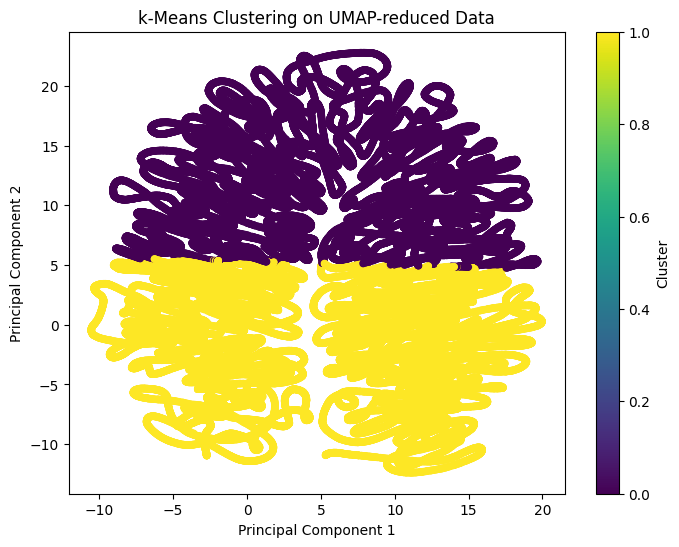

In [12]:
import matplotlib.pyplot as plt

# Plot clusters for k-Means on UMAP-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=kmeans_labels_umap, cmap='viridis', s=20)
plt.title('k-Means Clustering on UMAP-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

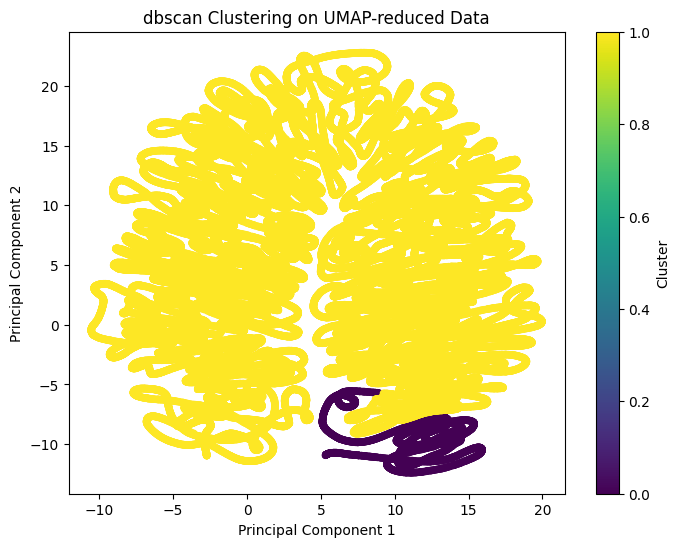

In [13]:
# Plot clusters for dbscan on UMAP-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=dbscan_clusters, cmap='viridis', s=20)
plt.title('dbscan Clustering on UMAP-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

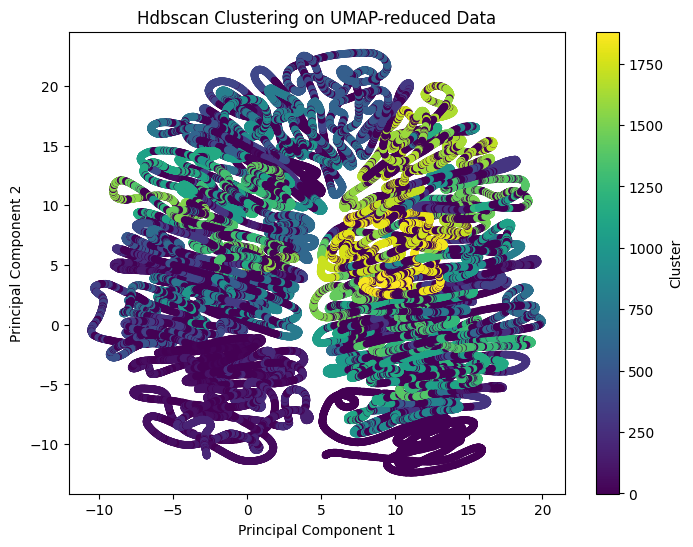

In [23]:
# Plot clusters for dbscan on UMAP-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=hdbscan_clusters, cmap='viridis', s=20)
plt.title('Hdbscan Clustering on UMAP-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

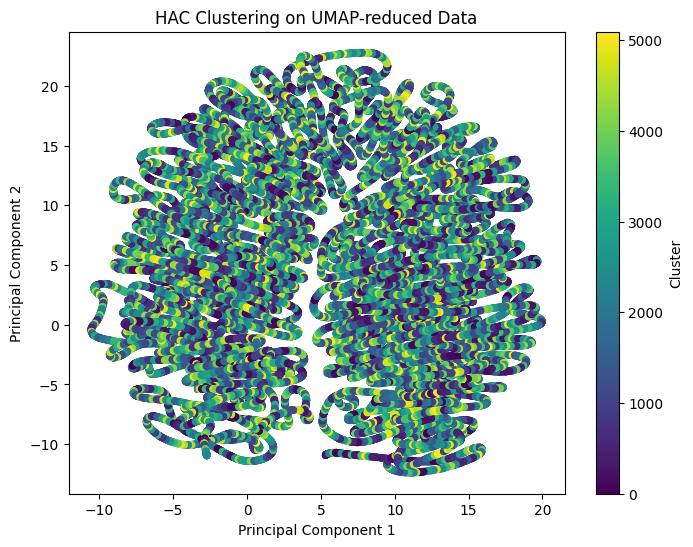

In [28]:
# Plot clusters for dbscan on UMAP-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=hac_clusters, cmap='viridis', s=20)
plt.title('HAC Clustering on UMAP-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

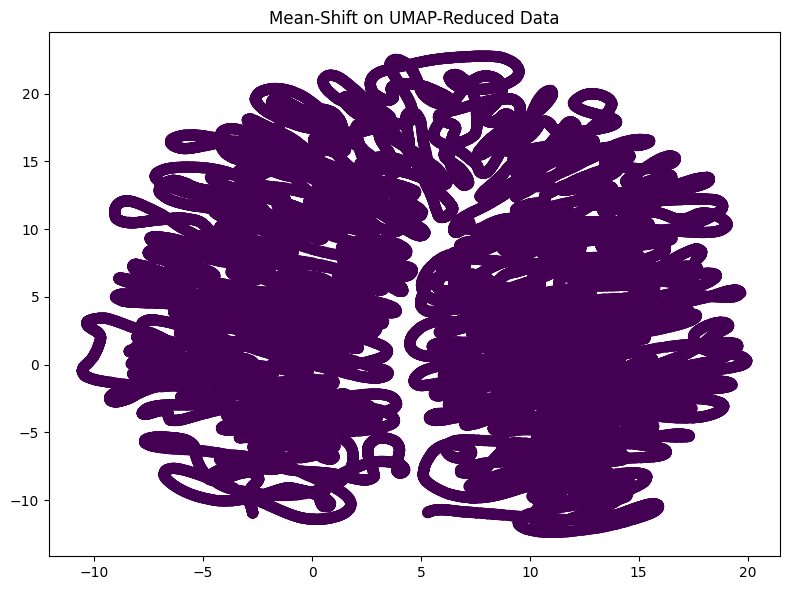

In [36]:
# Visualization
plt.figure(figsize=(8,6))
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=ms_umap.labels_, cmap='viridis', s=50)
plt.title('Mean-Shift on UMAP-Reduced Data')
plt.tight_layout()
plt.show()

/tmp/ipykernel_5071/1178141471.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_umap[indices, 0], x_umap[indices, 1], c=color, label=label, cmap='viridis', s=20)


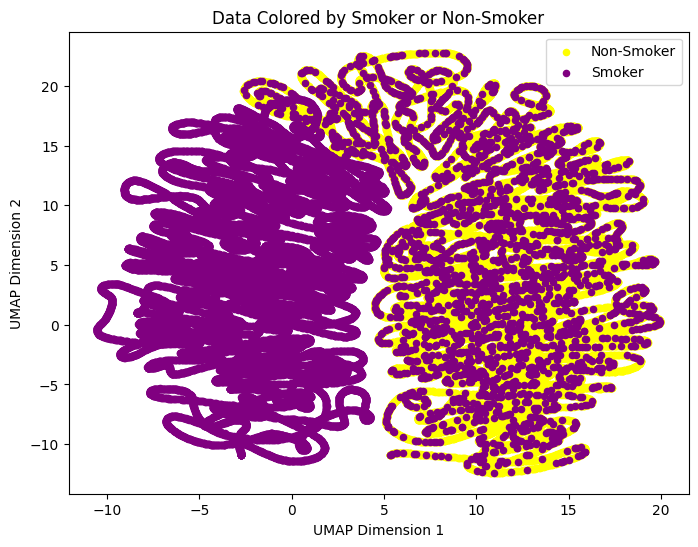

In [21]:
# Assuming ohe_y_resampled contains the labels for each data point ("Smoker" or "Non-Smoker")
# Mapping labels to colors
smoking_colors = {'Non-Smoker': 'yellow', 'Smoker': 'purple'}

# Plot clusters for dbscan on UMAP-reduced data
plt.figure(figsize=(8, 6))
for label, color in smoking_colors.items():
    indices = np.where(ohe_y_resampled == label)[0]
    plt.scatter(x_umap[indices, 0], x_umap[indices, 1], c=color, label=label, cmap='viridis', s=20)

plt.title('Data Colored by Smoker or Non-Smoker')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()
